# **1-Import Libraries**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/credit-card-approval/Card-evolution_Cover.png
/kaggle/input/credit-card-approval/train_data.csv
/kaggle/input/credit-card-approval/test_data.csv


In [49]:
import datetime
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score 
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

In [4]:
train = pd.read_csv("/kaggle/input/credit-card-approval/train_data.csv")
test =pd.read_csv("/kaggle/input/credit-card-approval/train_data.csv")
train

,ID,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Has a mobile phone,Has a work phone,Has a phone,Has an email,Job title,Family member count,Account age,Is high risk
0,5037048,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,1,0,0,0,Core staff,2.0,-17.0,0
1,5044630,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,1,0,0,0,Accountants,2.0,-1.0,0
2,5079079,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,1,0,0,0,Laborers,4.0,-38.0,0
3,5112872,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,1,0,0,1,Managers,1.0,-11.0,0
4,5105858,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,1,0,1,0,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,5067139,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,1,0,1,1,NaN,1.0,-5.0,0
29161,5029193,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,1,0,0,0,Core staff,3.0,-24.0,0
29162,5047710,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,1,1,1,0,Managers,2.0,-29.0,0
29163,5009886,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,1,0,1,0,NaN,2.0,-37.0,0


# **2-Preprocesing**

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   29165 non-null  int64  
 1   Gender               29165 non-null  object 
 2   Has a car            29165 non-null  object 
 3   Has a property       29165 non-null  object 
 4   Children count       29165 non-null  int64  
 5   Income               29165 non-null  float64
 6   Employment status    29165 non-null  object 
 7   Education level      29165 non-null  object 
 8   Marital status       29165 non-null  object 
 9   Dwelling             29165 non-null  object 
 10  Age                  29165 non-null  int64  
 11  Employment length    29165 non-null  int64  
 12  Has a mobile phone   29165 non-null  int64  
 13  Has a work phone     29165 non-null  int64  
 14  Has a phone          29165 non-null  int64  
 15  Has an email         29165 non-null 

## Drop the useless columns 

In [11]:
train.drop(columns=["ID", "Has a mobile phone", "Has a work phone", "Has a phone", "Has an email"], inplace = True)
test.drop(columns=["ID", "Has a mobile phone", "Has a work phone", "Has a phone", "Has an email"], inplace = True)

In [12]:
train

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Job title,Family member count,Account age,Is high risk
0,M,Y,Y,0,135000.0,Working,Secondary / secondary special,Married,With parents,-16271,-3111,Core staff,2.0,-17.0,0
1,F,Y,N,1,135000.0,Commercial associate,Higher education,Single / not married,House / apartment,-10130,-1651,Accountants,2.0,-1.0,0
2,F,N,Y,2,180000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-12821,-5657,Laborers,4.0,-38.0,0
3,F,Y,Y,0,360000.0,Commercial associate,Higher education,Single / not married,House / apartment,-20929,-2046,Managers,1.0,-11.0,0
4,F,N,N,0,270000.0,Working,Secondary / secondary special,Separated,House / apartment,-16207,-515,NaN,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,F,N,Y,0,112500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-23400,365243,NaN,1.0,-5.0,0
29161,F,N,Y,1,135000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15532,-8256,Core staff,3.0,-24.0,0
29162,F,N,Y,0,76500.0,Working,Secondary / secondary special,Married,House / apartment,-17782,-3291,Managers,2.0,-29.0,0
29163,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21635,365243,NaN,2.0,-37.0,0


## Fill the Nan values

In [13]:
train["Job title"] = train["Job title"].fillna("UnKnown")
test["Job title"] = test["Job title"].fillna("UnKnown")

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29165 entries, 0 to 29164
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               29165 non-null  object 
 1   Has a car            29165 non-null  object 
 2   Has a property       29165 non-null  object 
 3   Children count       29165 non-null  int64  
 4   Income               29165 non-null  float64
 5   Employment status    29165 non-null  object 
 6   Education level      29165 non-null  object 
 7   Marital status       29165 non-null  object 
 8   Dwelling             29165 non-null  object 
 9   Age                  29165 non-null  int64  
 10  Employment length    29165 non-null  int64  
 11  Job title            29165 non-null  object 
 12  Family member count  29165 non-null  float64
 13  Account age          29165 non-null  float64
 14  Is high risk         29165 non-null  int64  
dtypes: float64(3), int64(4), object(8)
m

In [18]:
numeric_columns_with_null = train.select_dtypes(include=['number']).columns[train.select_dtypes(include=['number']).any()]
numeric_columns_with_null

Index(['Children count', 'Income', 'Age', 'Employment length',
       'Family member count', 'Account age', 'Is high risk'],
      dtype='object')

In [19]:
object_columns_with_null = train.select_dtypes(exclude=['number']).columns[train.select_dtypes(exclude=['number']).any()]
object_columns_with_null

Index(['Gender', 'Has a car', 'Has a property', 'Employment status',
       'Education level', 'Marital status', 'Dwelling', 'Job title'],
      dtype='object')

## Data Scaling 

In [28]:
scaler = MinMaxScaler()
train["Income"]= scaler.fit_transform(train["Income"].values.reshape(-1,1))
test["Income"]= scaler.fit_transform(test["Income"].values.reshape(-1,1))
train["Age"]= scaler.fit_transform(train["Age"].values.reshape(-1,1))
test["Age"]= scaler.fit_transform(test["Age"].values.reshape(-1,1))
train["Employment length"]= scaler.fit_transform(train["Employment length"].values.reshape(-1,1))
test["Employment length"]= scaler.fit_transform(test["Employment length"].values.reshape(-1,1))

In [29]:
train

,Gender,Has a car,Has a property,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Job title,Family member count,Account age,Is high risk
0,M,Y,Y,0,0.069767,Working,Secondary / secondary special,Married,With parents,0.509027,0.033080,Core staff,2.0,-17.0,0
1,F,Y,N,1,0.069767,Commercial associate,Higher education,Single / not married,House / apartment,0.861008,0.036912,Accountants,2.0,-1.0,0
2,F,N,Y,2,0.098837,Commercial associate,Secondary / secondary special,Married,House / apartment,0.706769,0.026397,Laborers,4.0,-38.0,0
3,F,Y,Y,0,0.215116,Commercial associate,Higher education,Single / not married,House / apartment,0.242047,0.035876,Managers,1.0,-11.0,0
4,F,N,N,0,0.156977,Working,Secondary / secondary special,Separated,House / apartment,0.512696,0.039894,UnKnown,1.0,-41.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,F,N,Y,0,0.055233,Pensioner,Secondary / secondary special,Single / not married,House / apartment,0.100418,1.000000,UnKnown,1.0,-5.0,0
29161,F,N,Y,1,0.069767,Commercial associate,Secondary / secondary special,Married,House / apartment,0.551384,0.019574,Core staff,3.0,-24.0,0
29162,F,N,Y,0,0.031977,Working,Secondary / secondary special,Married,House / apartment,0.422422,0.032607,Managers,2.0,-29.0,0
29163,F,N,Y,0,0.084302,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,0.201582,1.000000,UnKnown,2.0,-37.0,0


## Using OneHotEncoder 

In [43]:
onehotencoder = OneHotEncoder()

columns_to_encode = ["Gender", "Has a car", "Has a property"]

for column in columns_to_encode:
    
    train_encoded = onehotencoder.fit_transform(train[column].values.reshape(-1, 1)).toarray()
    
    test_encoded = onehotencoder.transform(test[column].values.reshape(-1, 1)).toarray()
    
    # Get the column names for the new one-hot-encoded columns
    feature_names = onehotencoder.get_feature_names_out([column])
    
     train_encoded_df = pd.DataFrame(train_encoded, columns=feature_names)
    test_encoded_df = pd.DataFrame(test_encoded, columns=feature_names)
    train = pd.concat([train, train_encoded_df], axis=1)
    test = pd.concat([test, test_encoded_df], axis=1)
    
    train.drop(column, axis=1, inplace=True)
    test.drop(column, axis=1, inplace=True)

## Using LabelEncoder

In [45]:
labelencoder = LabelEncoder()

columns_to_encode = ["Employment status", "Education level", "Marital status", "Dwelling", "Job title"]

for column in columns_to_encode :
    
    train[column] = labelencoder.fit_transform(train[column]) 
    test[column] = labelencoder.fit_transform(test[column]) 

In [46]:
train

,Children count,Income,Employment status,Education level,Marital status,Dwelling,Age,Employment length,Job title,Family member count,Account age,Is high risk,Gender_F,Gender_M,Has a car_N,Has a car_Y,Has a property_N,Has a property_Y
0,0,0.069767,4,4,1,5,0.509027,0.033080,3,2.0,-17.0,0,0.0,1.0,0.0,1.0,0.0,1.0
1,1,0.069767,0,1,3,1,0.861008,0.036912,0,2.0,-1.0,0,1.0,0.0,0.0,1.0,1.0,0.0
2,2,0.098837,0,4,1,1,0.706769,0.026397,8,4.0,-38.0,0,1.0,0.0,1.0,0.0,0.0,1.0
3,0,0.215116,0,1,3,1,0.242047,0.035876,10,1.0,-11.0,0,1.0,0.0,0.0,1.0,0.0,1.0
4,0,0.156977,4,4,2,1,0.512696,0.039894,17,1.0,-41.0,0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29160,0,0.055233,1,4,3,1,0.100418,1.000000,17,1.0,-5.0,0,1.0,0.0,1.0,0.0,0.0,1.0
29161,1,0.069767,0,4,1,1,0.551384,0.019574,3,3.0,-24.0,0,1.0,0.0,1.0,0.0,0.0,1.0
29162,0,0.031977,4,4,1,1,0.422422,0.032607,10,2.0,-29.0,0,1.0,0.0,1.0,0.0,0.0,1.0
29163,0,0.084302,1,4,0,1,0.201582,1.000000,17,2.0,-37.0,0,1.0,0.0,1.0,0.0,0.0,1.0


# **3-EDA**

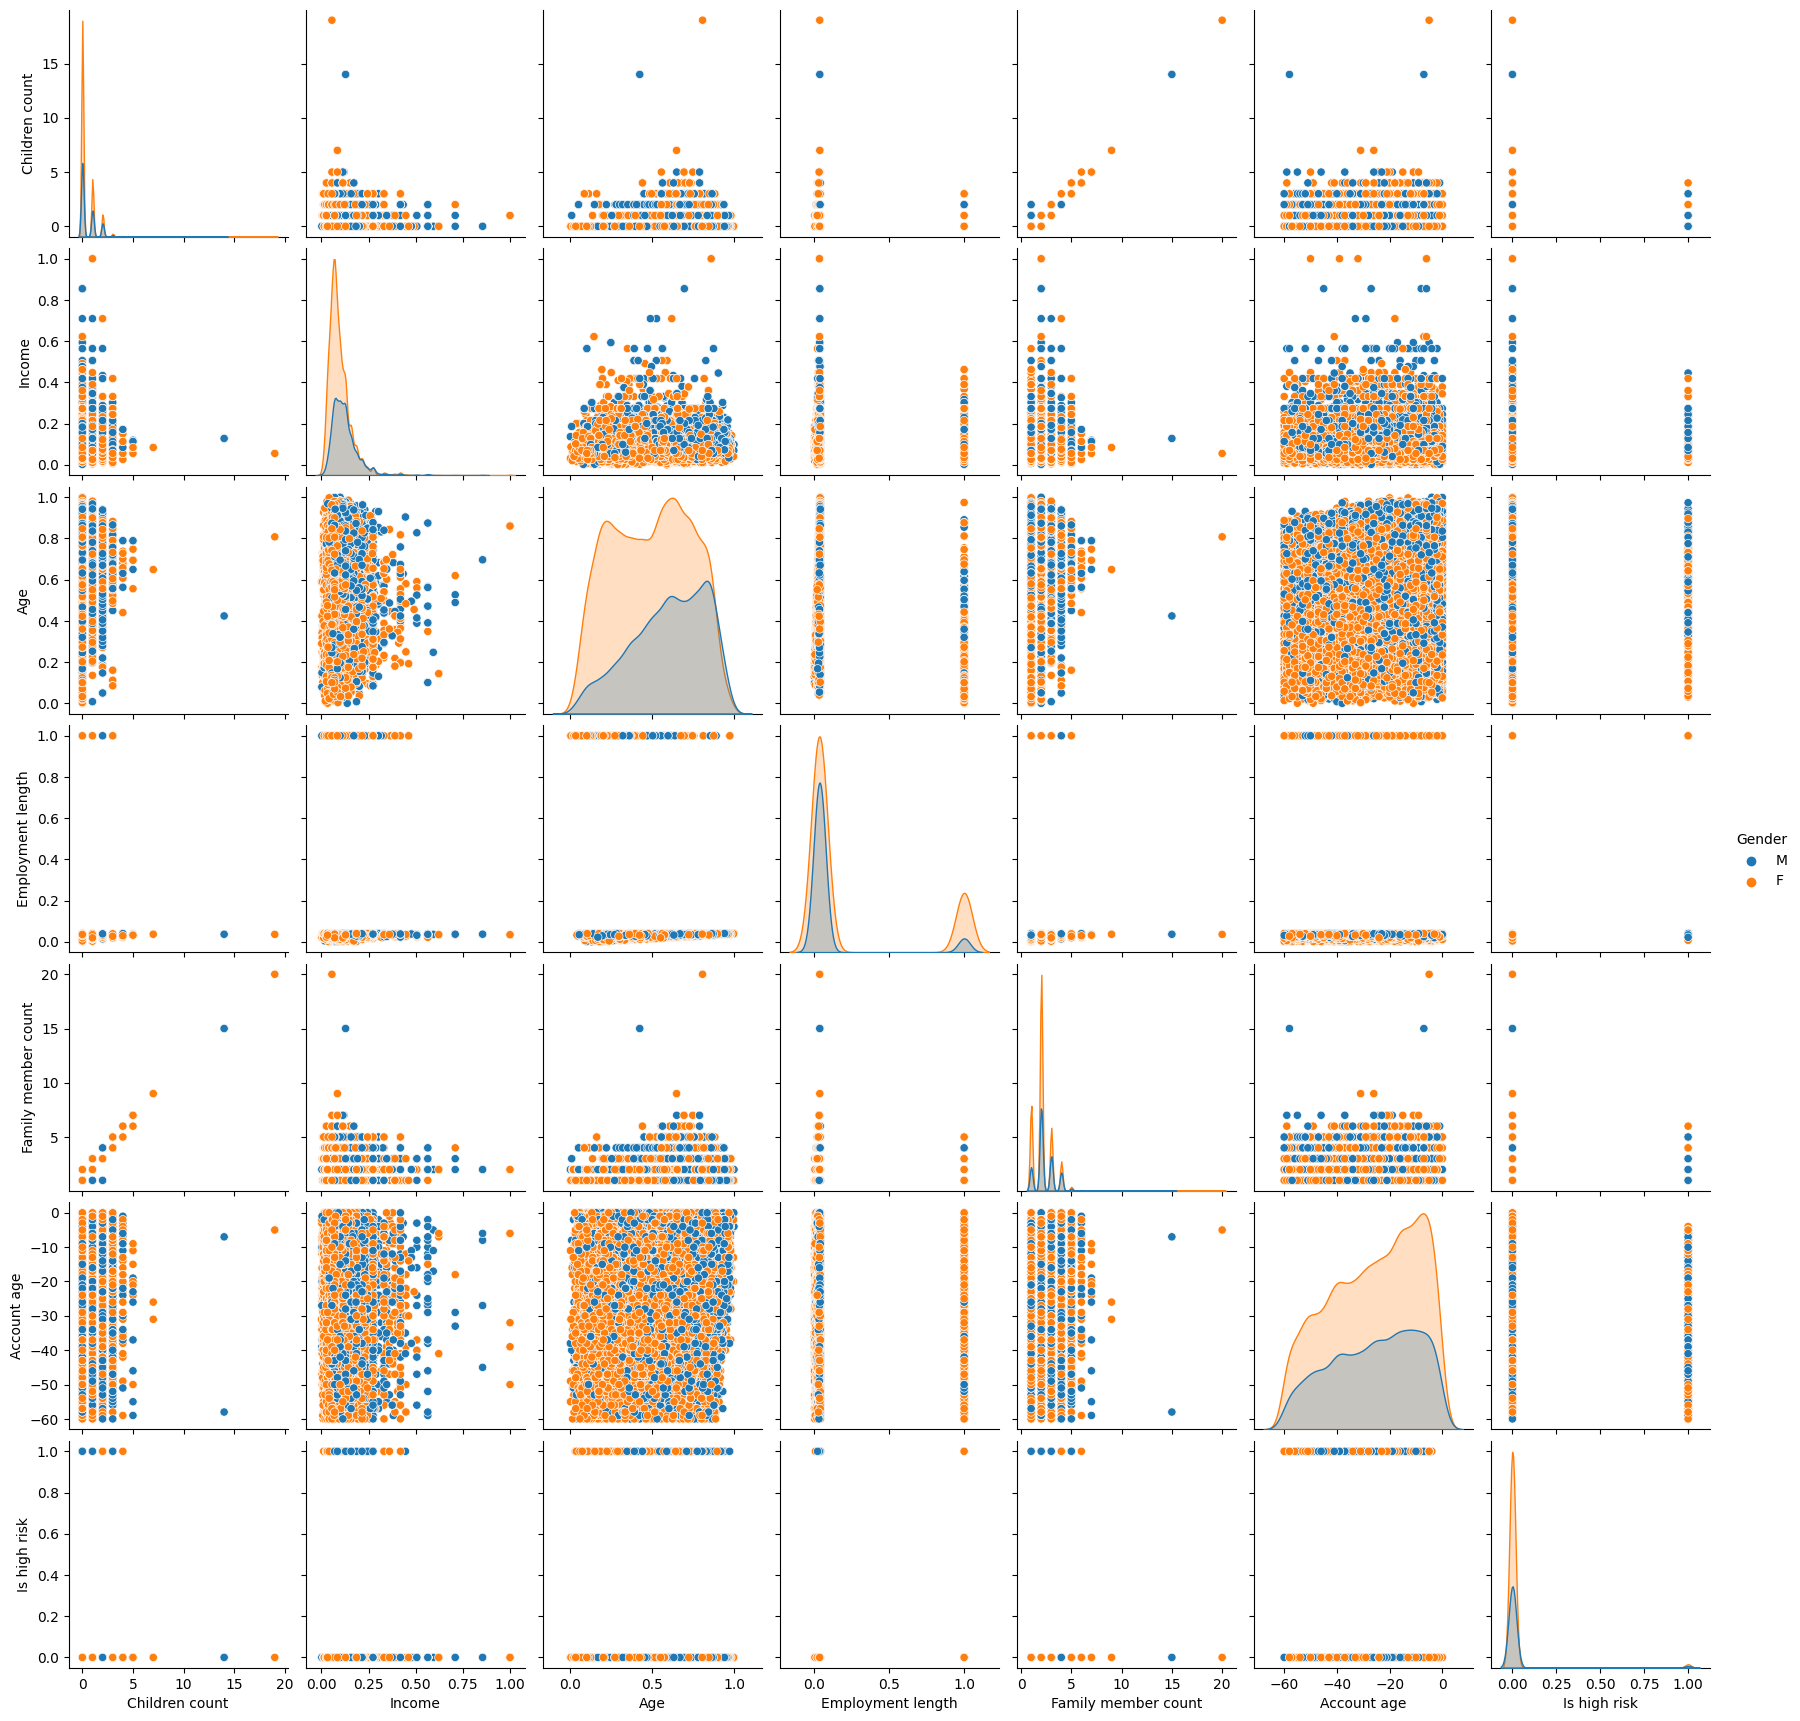

In [30]:
sns.pairplot(train, hue='Gender', kind='scatter', diag_kind='kde')

In [48]:
X_train = train.drop(columns=["Is high risk"])
Y_train = train["Is high risk"]
X_test = test.drop(columns=["Is high risk"])
Y_test = test["Is high risk"]

# **4-Make the model**

In [50]:
model_SVM = SVC()
model_SVM.fit(X_train,Y_train)

SVC()

In [51]:
model_SVM.score(X_train,Y_train)

0.9828904508829076

In [52]:
model_RandomForest = RandomForestClassifier()
model_RandomForest.fit(X_train,Y_train)

RandomForestClassifier()

In [53]:
model_RandomForest.score(X_train,Y_train)

0.9985599177095834

In [54]:
y_pred = model_SVM.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [55]:
accuracy = accuracy_score(Y_test, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.9828904508829076
